<a href="https://colab.research.google.com/github/aayush64x/learning-git/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!unzip /content/drive/MyDrive/Datasets/Movies/movie.zip -d /content/drive/MyDrive/Datasets/Movies

Archive:  /content/drive/MyDrive/Datasets/Movies/movie.zip
  inflating: /content/drive/MyDrive/Datasets/Movies/IMDB Dataset.csv  


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Movies/IMDB Dataset.csv')

In [8]:
df.head(100)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


In [9]:
print(df.isnull())

       review  sentiment
0       False      False
1       False      False
2       False      False
3       False      False
4       False      False
...       ...        ...
49995   False      False
49996   False      False
49997   False      False
49998   False      False
49999   False      False

[50000 rows x 2 columns]


In [10]:
df.shape

(50000, 2)

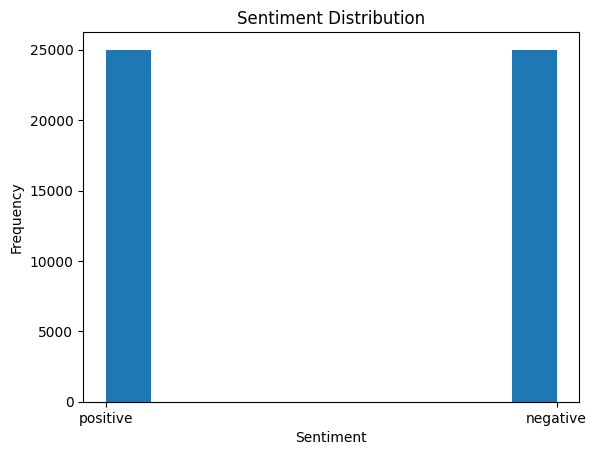

In [20]:
plt.hist(df['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.show()

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape
train.head()

,review,sentiment
39087,That's what I kept asking myself during the ma...,negative
30893,I did not watch the entire movie. I could not ...,negative
45278,A touching love story reminiscent of In the M...,positive
16398,This latter-day Fulci schlocker is a totally a...,negative
13653,"First of all, I firmly believe that Norwegian ...",negative


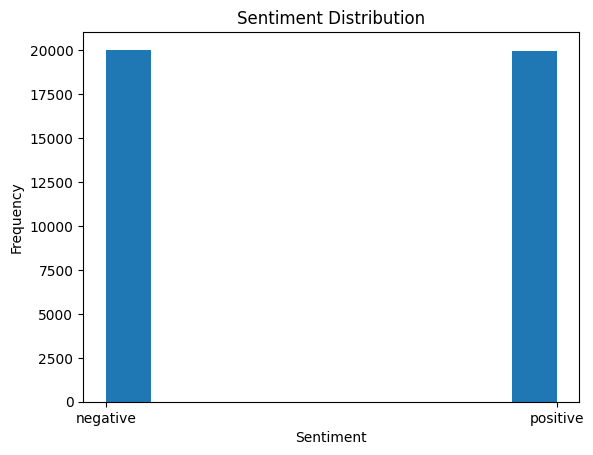

In [23]:
plt.hist(train['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.show()

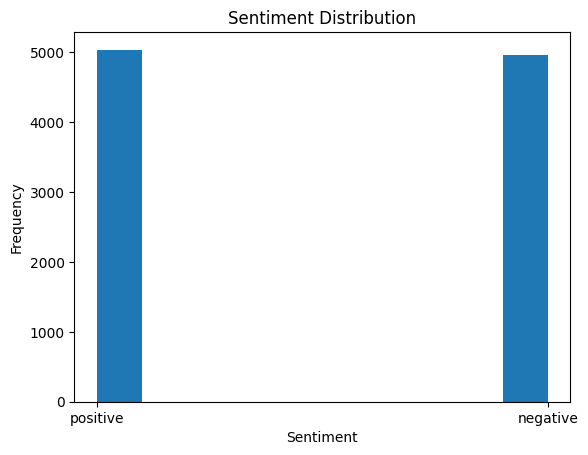

In [24]:
plt.hist(test['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.show()

In [6]:
!pip install transformers

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train['sentiment'] = train['sentiment'].replace({'Positive':1, 'Negative':0})

In [9]:
def preprocess(text, tokenizer, max_length=128):
  inputs = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
  return inputs

train = preprocess(train['review'].tolist(), tokenizer)
test = preprocess(test['review'].tolist(), tokenizer)



In [13]:
!pip install scikit-learn

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [55]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Accuracy: 0.8908
(40000, 10000)
(40000,)
(10000, 10000)
(10000,)


In [56]:
test_sentences = [
    "I absolutely loved the movie, it was amazing!",    # Positive sentiment
    "The movie was a waste of time, really bad.",       # Negative sentiment
    "It was okay, neither good nor bad.",              # Neutral sentiment
    "The film was incredibly boring and slow.",        # Negative sentiment
    "A fantastic experience, I would watch it again!",  # Positive sentiment
    "Not the best movie, but not the worst either."     # Neutral sentiment
]

# Transform the custom test sentences using the fitted vectorizer
test_sentences_tfidf = vectorizer.transform(test_sentences)

# Predict sentiment using the trained logistic regression model
predictions = model.predict(test_sentences_tfidf)

# Print the predictions (1 = Positive, 0 = Negative)
print(predictions)


['positive' 'negative' 'negative' 'negative' 'positive' 'negative']
